# Imbalanced Classes
## In this lab, we are going to explore a case of imbalanced classes. 


Like we disussed in class, when we have noisy data, if we are not careful, we can end up fitting our model to the noise in the data and not the 'signal'-- the factors that actually determine the outcome. This is called overfitting, and results in good results in training, and in bad results when the model is applied to real data. Similarly, we could have a model that is too simplistic to accurately model the signal. This produces a model that doesnt work well (ever). 


### First, download the data from: https://drive.google.com/uc?id=1oRNf2muX8VLH8ky5F_cTgGYbHlD-ZwVK&export=download. Import the dataset and provide some discriptive statistics and plots. What do you think will be the important features in determining the outcome?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

data= pd.read_csv('C:/Users/olivi/Downloads/paysim.csv')
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [2]:
data.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [3]:
data.select_dtypes(include=object)

,type,nameOrig,nameDest
0,PAYMENT,C1231006815,M1979787155
1,PAYMENT,C1666544295,M2044282225
2,TRANSFER,C1305486145,C553264065
3,CASH_OUT,C840083671,C38997010
4,PAYMENT,C2048537720,M1230701703
...,...,...,...
6362615,CASH_OUT,C786484425,C776919290
6362616,TRANSFER,C1529008245,C1881841831
6362617,CASH_OUT,C1162922333,C1365125890
6362618,TRANSFER,C1685995037,C2080388513


In [4]:
data.step.value_counts()

19     51352
18     49579
187    49083
235    47491
307    46968
       ...  
432        4
706        4
693        4
112        2
662        2
Name: step, Length: 743, dtype: int64

In [5]:
data.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

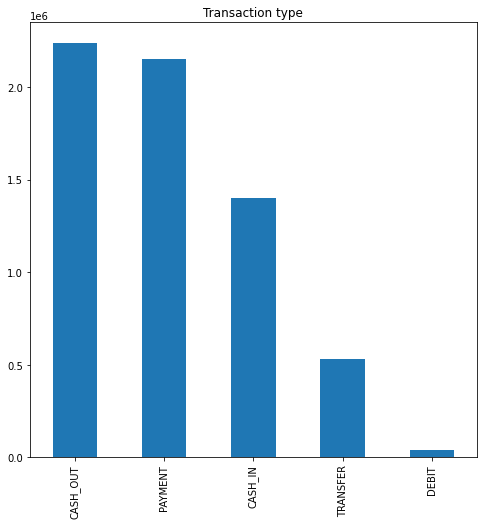

In [6]:
f, ax = plt.subplots(1, 1, figsize=(8, 8))
data.type.value_counts().plot(kind='bar', title="Transaction type", ax=ax, figsize=(8,8))
plt.show()

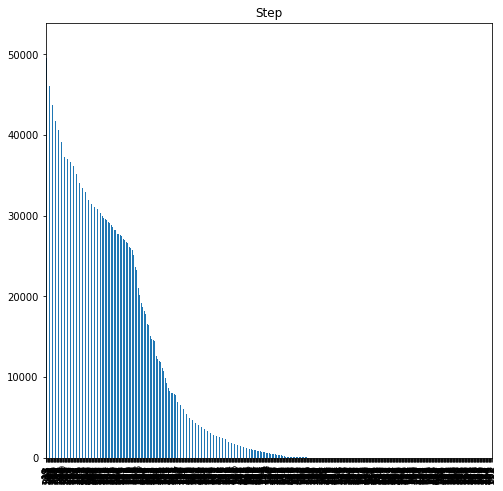

In [7]:
f, ax = plt.subplots(1, 1, figsize=(8, 8))
data.step.value_counts().plot(kind='bar', title="Step", ax=ax, figsize=(8,8))
plt.show()

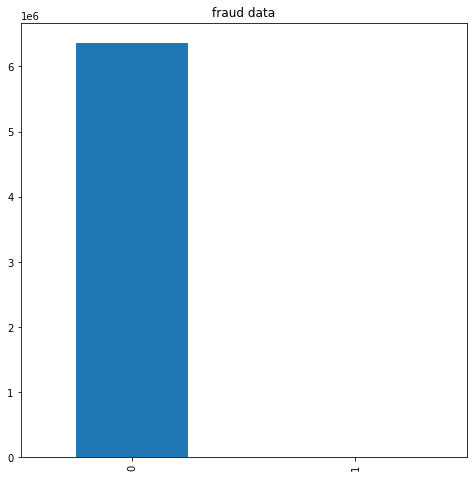

In [8]:
f, ax = plt.subplots(1, 1, figsize=(8, 8))
data.isFraud.value_counts().plot(kind='bar', title="fraud data", ax=ax, figsize=(8,8))
plt.show()

In [9]:
data.isFraud.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

C:\Users\olivi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='isFraud', ylabel='Density'>

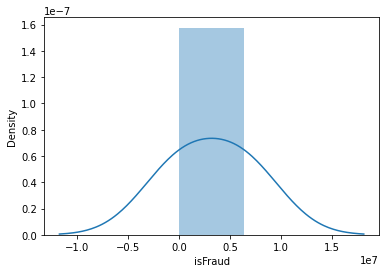

In [10]:
sns.distplot(data.isFraud.value_counts())


In [11]:
# the data is highly imbalanced

### What is the distribution of the outcome? 

In [12]:
# Your response here
#the distribution is right skewed

### Clean the dataset. How are you going to integrate the time variable? Do you think the step (integer) coding in which it is given is appropriate?

In [13]:
import pandas as pd
import numpy as np

In [14]:
data.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [16]:
data.type.value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [17]:
data.nameOrig.value_counts()

C1902386530    3
C363736674     3
C545315117     3
C724452879     3
C1784010646    3
              ..
C98968405      1
C720209255     1
C1567523029    1
C644777639     1
C1280323807    1
Name: nameOrig, Length: 6353307, dtype: int64

In [18]:
data.nameDest.value_counts()

C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
              ... 
M1470027725      1
M1330329251      1
M1784358659      1
M2081431099      1
C2080388513      1
Name: nameDest, Length: 2722362, dtype: int64

<AxesSubplot:>

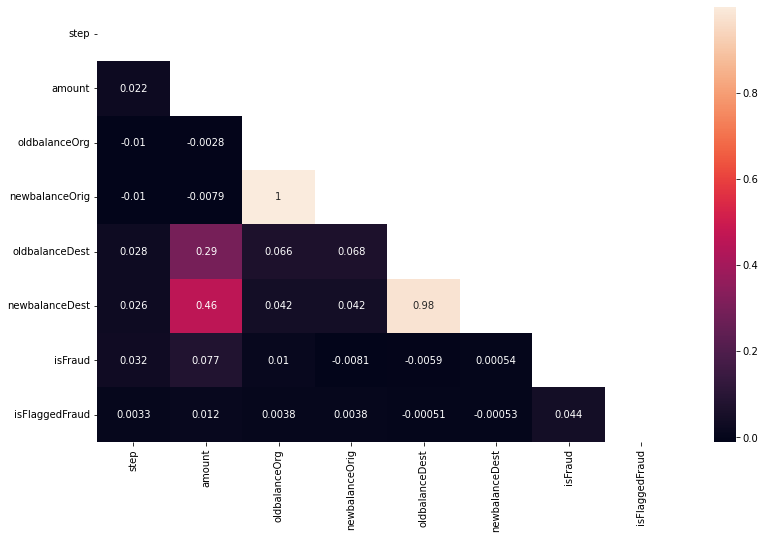

In [19]:
corr = data.corr()

# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(corr)

# using the upper triangle matrix as mask 
plt.figure(figsize=(13, 8))
sns.heatmap(corr, annot=True, mask=matrix)

In [20]:
data.drop(['oldbalanceOrg', 'oldbalanceDest'], axis=1, inplace=True)

In [21]:
data.select_dtypes(include=object).nunique()

type              5
nameOrig    6353307
nameDest    2722362
dtype: int64

In [22]:
data.drop(['nameOrig', 'nameDest'], axis=1, inplace=True)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   newbalanceOrig  float64
 4   newbalanceDest  float64
 5   isFraud         int64  
 6   isFlaggedFraud  int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 339.8+ MB


In [24]:
data_dummies = pd.get_dummies(data)
data_dummies.head()

,step,amount,newbalanceOrig,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,160296.36,0.0,0,0,0,0,0,1,0
1,1,1864.28,19384.72,0.0,0,0,0,0,0,1,0
2,1,181.00,0.00,0.0,1,0,0,0,0,0,1
3,1,181.00,0.00,0.0,1,0,0,1,0,0,0
4,1,11668.14,29885.86,0.0,0,0,0,0,0,1,0


### Run a logisitc regression classifier and evaluate its accuracy.

In [25]:
# Your code here

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

X = data_dummies.drop(['isFraud', 'isFlaggedFraud'], axis = 1)
y = data_dummies.isFraud

lr = LogisticRegression(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=True)
lr.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [26]:
from sklearn.metrics import r2_score

y_pred = lr.predict(X_train)
r2_score(y_true = y_train, y_pred = y_pred).round(4)

-0.5916

Confusion matrix on TRAIN


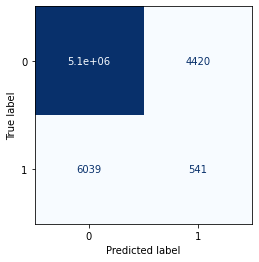

In [27]:
print('Confusion matrix on TRAIN')
ConfusionMatrixDisplay.from_predictions(y_train, lr.predict(X_train), cmap='Blues', colorbar=False)

Confusion matrix on TEST


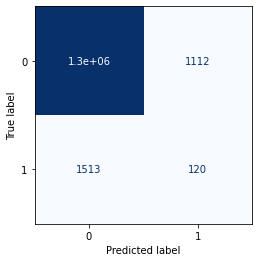

In [28]:
print('Confusion matrix on TEST')
ConfusionMatrixDisplay.from_predictions(y_test, lr.predict(X_test), cmap='Blues', colorbar=False)

### Now pick a model of your choice and evaluate its accuracy.

In [29]:
# Your code here

from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=8)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8)

Confusion matrix on TRAIN


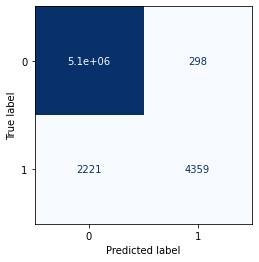

In [30]:
print('Confusion matrix on TRAIN')
ConfusionMatrixDisplay.from_predictions(y_train, dtc.predict(X_train), cmap='Blues', colorbar=False)

Confusion matrix on TEST


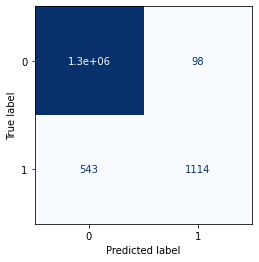

In [35]:
print('Confusion matrix on TEST')
ConfusionMatrixDisplay.from_predictions(y_test, dtc.predict(X_test), cmap='Blues', colorbar=False)

### Which model worked better and how do you know?

In [2]:
# Your response here

#DTC clearly shows an edge over LR in terms of accuracy and other performance metrics

### Let's use NearMiss method for undersampling and compare the results with previous

In [37]:
pip install imblearn

     -------------------------------------- 199.1/199.1 KB 4.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [31]:
from collections import Counter
from imblearn.under_sampling import NearMiss
nm = NearMiss()
X_train_res_nm, y_train_res_nm = nm.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_train_res_nm))

Resampled dataset shape Counter({0: 6580, 1: 6580})


In [32]:
dtc.fit(X_train_res_nm, y_train_res_nm)

DecisionTreeClassifier(max_depth=8)

Confusion matrix on TEST


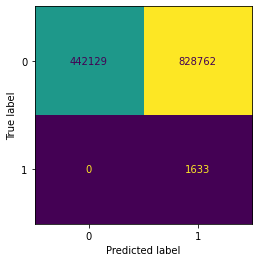

In [33]:
print('Confusion matrix on TEST')
ConfusionMatrixDisplay.from_predictions(y_test, dtc.predict(X_test), colorbar=False)

In [ ]:
#So so many false positives it hurts !

### And now let's apply SMOTE

In [34]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train_res_smote, y_train_res_smote = smote.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_train_res_smote))

Resampled dataset shape Counter({0: 5083516, 1: 5083516})


In [35]:
dtc.fit(X_train_res_smote, y_train_res_smote)

DecisionTreeClassifier(max_depth=8)

Confusion matrix on TEST


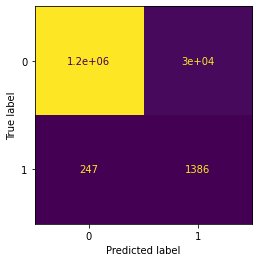

In [36]:
print('Confusion matrix on TEST')
ConfusionMatrixDisplay.from_predictions(y_test, dtc.predict(X_test), colorbar=False)

### Apply your model on improved data

### Calculate classification report for imbalanced data to evaluate the models

In [37]:
from imblearn.metrics import classification_report_imbalanced

print(classification_report_imbalanced(y_test, dtc.predict(X_test)))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.98      0.85      0.99      0.91      0.84   1270891
          1       0.04      0.85      0.98      0.08      0.91      0.82      1633

avg / total       1.00      0.98      0.85      0.99      0.91      0.84   1272524



### What is your conclusion?

In [ ]:
#Even after correction of imbalance, the number of flase positives remains quite high !